# Progetto: Video games dataset (9)

Miggiano Davide

In [64]:
import os
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sb #Heat map

#!pip install scipy==1.7.0
import scipy
print (scipy.__version__)

1.7.0


**Dateset Video Games**

Il dataset Video_Games contiene un campione di video giochi rilasciati tra il 1980 e il 2020.

In [3]:
#Importiamo il dataset
games = pd.read_csv('Video_Games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## Preparazione

In questa fase importiamo, ripuliamo e adattiamo le features del nostro dataset

Features del dataset:

- **Name**: Nome del gioco 
- **Platform**: Piattaforma di rilascio (possono essere multiple)
- **Year_of_Release**: Anno di uscita
- **Genre**: Genere del gioco
- **Publisher**: Casa editrice
- **NA_Sales**: Vendite in Nord America
- **EU_Sales**: Vendite in Europa
- **JP_Sales**: Vendite in Giappone
- **Other_Sales**: Altre vendite
- **Global_Sales**: Vendite nel mondo
- **Critic_Score**: Voto dei giornalisti su metacritic
- **Critic_Count**: Numero di voti dei giornalisti su metacritic
- **User_Score**: Voto degli utenti su Metacritic
- **User_Count**: Numero di voti degli utenti su metacritic
- **Developer**: Casa di sviluppo
- **Rating**: sistema di classificazione dei videogiochi, valutazione di quanto ogni videogioco introdotto sul mercato sia adatto ai giocatori, a seconda della loro età

In [4]:
# Palette colori
colors = ['#581845', '#900C3F', '#C70039', '#FF5733', '#FFC300', '#DAF7A6', '#4059D1', '#37CDBB', '#1BE214', '#8214E2', '#E214A6', '#89A129']

In [5]:
#Facciamoci un'idea sulla dimensione del dataset
print("Righe:",games.shape[0])
print("Features:",games.shape[1])

Righe: 16719
Features: 16


Dividiamo il dataset in features qualitative e quantitative, così da determinare i tipi di dati a nostra disposizione 

In [6]:
qualitative = games[['Name', 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating']]
quantitative = games[['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']]

Utilizziamo il metodo describe() di pandas per calcolare alcuni dati statistici...

In [7]:
quantitative.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


Possiamo estrapolare alcune informazioni di base, come i giochi del nostro dataset sono stati rilasciati tra il 1980 e il 2020

In [8]:
qualitative.describe()

,Name,Platform,Genre,Publisher,Developer,Rating
count,16717,16719,16717,16665,10096,9950
unique,11562,31,12,581,1696,8
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,Ubisoft,E
freq,12,2161,3370,1356,204,3991


Controlliamo la quantità di valori mancanti per ogni features del dataset

In [9]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

### Rimozione valori nulli

Prendiamo in considerazione prima di tutto le colonne "Name" e 'Publisher', che avendo rispettivamente solo 2 e 54 righe con valori nulli (su 11562 uniche) non causano grande perdita di infromazioni, quindi possiamo pensare di rimuoverle.

In [10]:
games.drop(games[games.Name.isnull()].index, inplace=True)
games.drop(games[games.Publisher.isnull()].index, inplace=True)

Nelle features relative ai voti ed al loro numero abbiamo molti valori nulli, quindi possiamo prendere due approcci diversi:
1. Possiamo provare a completare i valori nulli con la media dei valori delle singole colonne... (games)
2. oppure possiamo rimuovere le righe (games_no_score)

In [11]:
# Facciamo la copia del dataset prima di rimuovere le righe nulle
games_no_score = games.copy()

In [12]:
# Rimuoviamo le righe nulle dei punteggi dalla copia del dataset
games_no_score.drop(games_no_score[games_no_score.Critic_Score.isnull()].index, inplace=True)
games_no_score.drop(games_no_score[games_no_score.Critic_Count.isnull()].index, inplace=True)
games_no_score.drop(games_no_score[games_no_score.User_Score.isnull()].index, inplace=True)
games_no_score.drop(games_no_score[games_no_score.User_Count.isnull()].index, inplace=True)

Converto la feature "User_Score" da stringa a float per usi successivi

In [13]:
#Trasformo la stringa 'tbd' (To be Defined) in NaN prima della conversione
games['User_Score']=games.User_Score.replace('tbd',np.nan).astype(float)
games_no_score['User_Score']=games_no_score.User_Score.replace('tbd',np.nan).astype(float)

#Trasformo la feature User_Score da obj a float
games['User_Score'] = games['User_Score'].astype(float)
games_no_score['User_Score'] = games_no_score['User_Score'].astype(float)

In [14]:
#Critic
avg_critic_score = games['Critic_Score'].mean()
avg_critic_count = games['Critic_Count'].mean()
games['Critic_Score'].fillna(avg_critic_score, inplace = True)
games['Critic_Count'].fillna(avg_critic_count, inplace = True)

#User
avg_user_score = games['User_Score'].mean()
avg_user_count = games['User_Count'].mean()
games['User_Score'].fillna(avg_user_score, inplace = True)
games['User_Count'].fillna(avg_user_count, inplace = True)

print ("{:<8} {:<20} {:<10}".format('Type','Avg Score','Avg Count'))
print ("{:<8} {:<20} {:<10}".format( "Critic", avg_critic_score, avg_critic_count))
print ("{:<8} {:<20} {:<10}".format( "User", avg_user_score, avg_user_count))

Type     Avg Score            Avg Count 
Critic   68.97307266691257    26.360260666420753
User     7.125936181434649    162.23958333333334


Per la data di rilascio la converto in valori interi e sostituisco i valori NaN con la media 

In [15]:
games['Year_of_Release'] = games['Year_of_Release'].fillna(games['Year_of_Release'].mean()).astype(int)

In [16]:
games.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer          6576
Rating             6720
dtype: int64

**Potrei riempire i valori nulli del Rating con uno tra i valori unici, suddividendoli in modo equo?**

`games.Rating.isnull().sum() % games.Rating.unique().size`

## Estrapolazione informazioni

### ***Quali sono state le vendite totali nei diversi paesi negli anni?***

In [17]:
#define index column
#games.set_index('Year_of_Release', inplace=True)

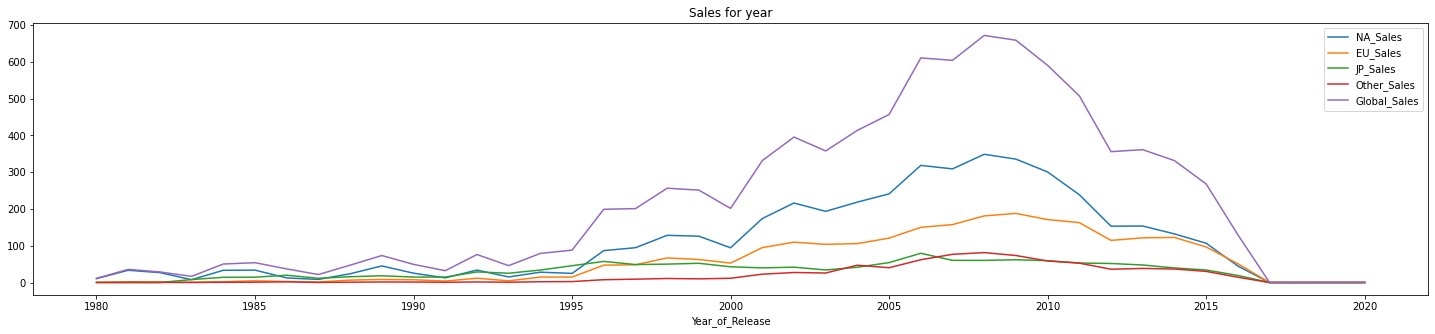

In [18]:
sales = games.groupby('Year_of_Release')[['NA_Sales','EU_Sales', 'JP_Sales','Other_Sales','Global_Sales']].sum()
sales.plot(kind='line', title = 'Sales for year', figsize = (25,5), legend=True)

Possiamo facilmente notare come le vendite a livello globale abbia iniziato la loro crescita a partire dal 1995, continuando fino al 2012 circa.

Con questa informazione potremmo concentrare le nostre ricerche nell'arco di questi 17 anni per cercare di capire cosa abbia causato questa crescita così improssiva di questo medium.

### ***Quanti giochi sono stati rilasciati per anno?***

In [19]:
#Troviamo la data di rilascio più piccola e più grande
minYear = games['Year_of_Release'].min()
maxYear = games['Year_of_Release'].max()
print("minimum value in column 'Year_of_Release': " , minYear)
print("maximum value in column 'Year_of_Release': " , maxYear)

minimum value in column 'Year_of_Release':  1980
maximum value in column 'Year_of_Release':  2020


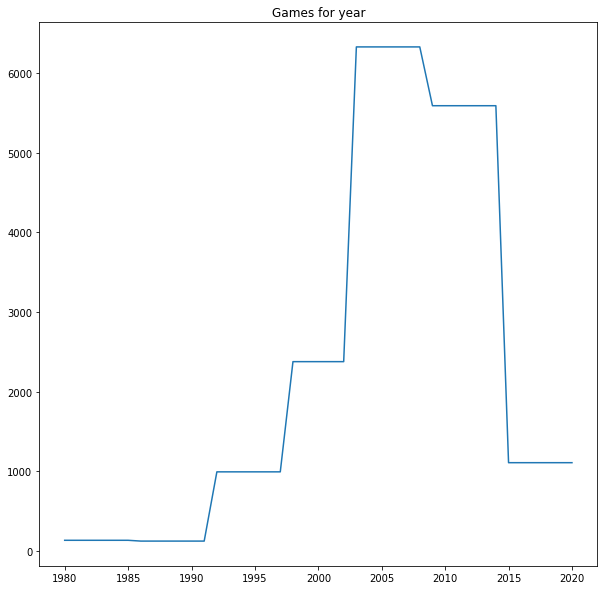

In [20]:
years = games['Year_of_Release'].value_counts(bins=7).reindex(np.asarray(range(int(minYear),int(maxYear+1),1)))
years.plot(kind = 'line', title = 'Games for year', figsize = (10,10))

Si nota facilmente come dai primi anni del 2000 fino al 2010 circa ci sia stata un'impennata in questo mercato.

Cerchiamo di capire quale potrebbe essere stata la causa di una tale crescita...

### ***Qual'è la distribuzione dei giochi per le diverse piattaforme?***

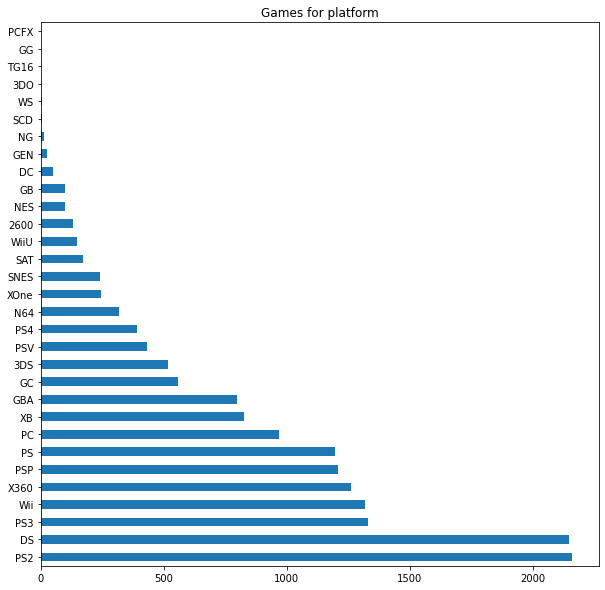

In [21]:
platforms = games['Platform'].value_counts()
platforms.plot(kind='barh', title = 'Games for platform', figsize = (10,10))

### ***Quale è stata la piattaforma con la media di vendita a livello globale più alta?***

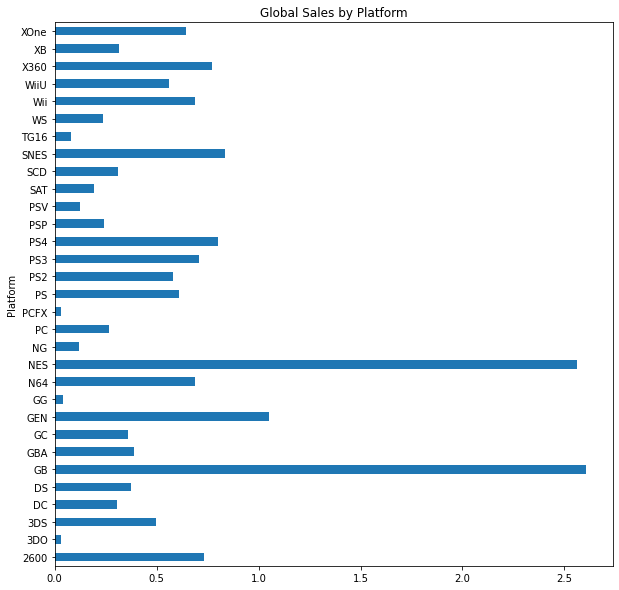

In [22]:
games.groupby('Platform')['Global_Sales'].mean().plot(kind='barh', title = 'Global Sales by Platform', figsize = (10,10))

Prendiamo però ora in considerazione solo le vendite tra il 2000 e il 2010

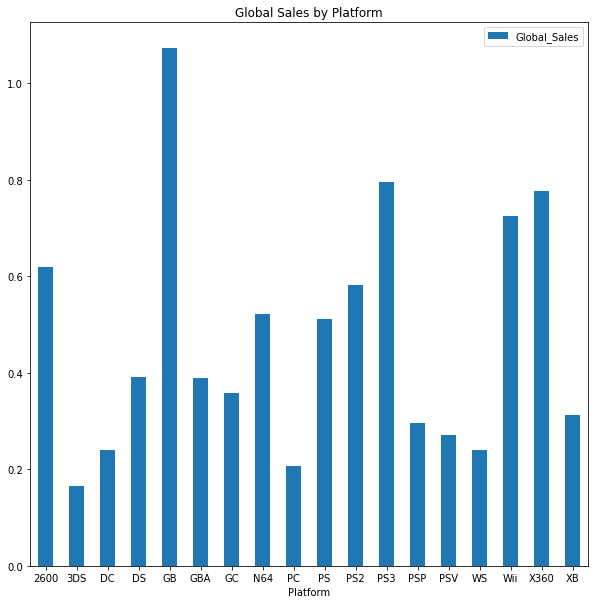

In [23]:
gamesInRange = games.query('Year_of_Release >= 2000 & Year_of_Release <= 2010')
gamesInRange.groupby('Platform')[['Global_Sales']].mean().plot(kind='bar', title = 'Global Sales by Platform', figsize = (10,10), rot=0)

### ***Quale è stata la distribuzione dei generi dal 1980 al 2020?***

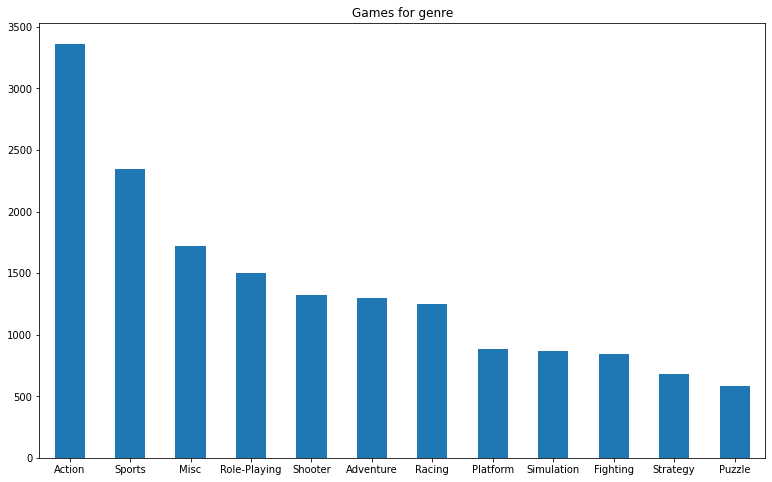

In [24]:
genres = games['Genre'].value_counts()
genres.plot(kind='bar', title = 'Games for genre', figsize = (13,8), rot=0)

### ***Vendite globali medie per genere?***

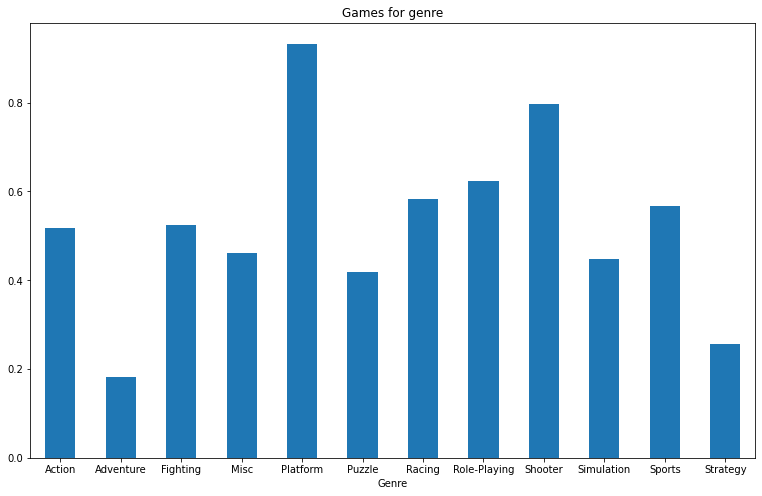

In [25]:
games.groupby("Genre")["Global_Sales"].mean().plot(kind='bar', title = 'Games for genre', figsize = (13,8), rot=0)

### ***Qual'è la media dei voti della critica e degli utenti per genere?***

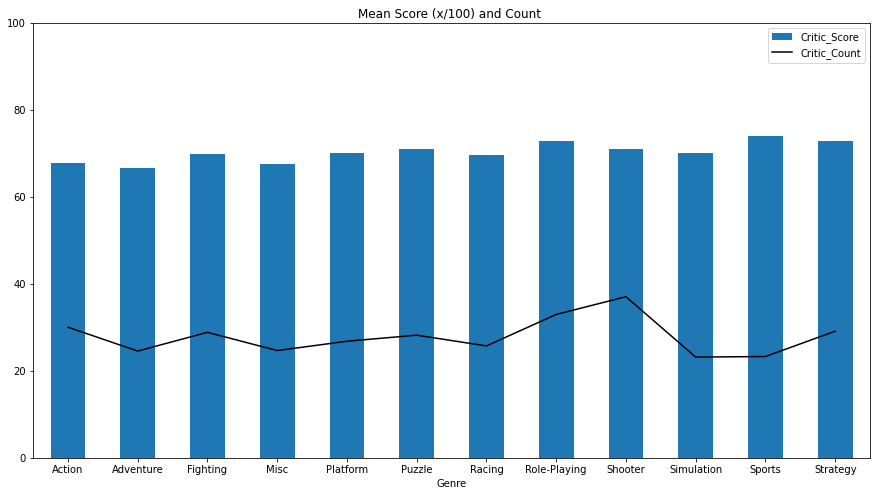

In [26]:
#Critic
#games.Critic_Score = games.Critic_Score.apply(lambda x:x/10)
games_no_score.groupby('Genre')['Critic_Score'].mean().plot(kind='bar', title = 'Mean Score (x/100) and Count ', figsize = (15,8), legend=True, ylim=(0,100))
games_no_score.groupby('Genre')['Critic_Count'].mean().plot(kind='line', figsize = (15,8), color='black', legend=True, ylim=(0,100))

Genre
Action          202.697078
Adventure       114.784906
Fighting         66.942408
Misc             33.636364
Platform        113.815271
Puzzle           33.768595
Racing           73.386288
Role-Playing    329.328710
Shooter         387.714447
Simulation       91.258170
Sports           45.151079
Strategy        212.333333
Name: User_Count, dtype: float64

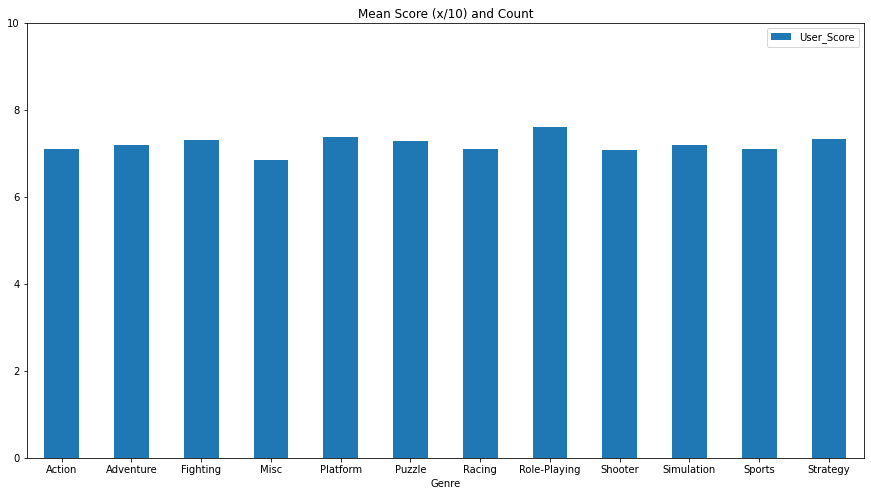

In [27]:
#User
games_no_score.groupby('Genre')['User_Score'].mean().plot(kind='bar', title = 'Mean Score (x/10) and Count', figsize = (15,8), legend=True, ylim=(0,10), rot=0)
games_no_score.groupby('Genre')['User_Count'].mean()

### ***Vendite medie per paesi della Nintendo***

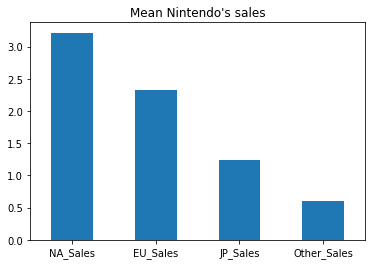

In [28]:
games[['NA_Sales','EU_Sales', 'JP_Sales','Other_Sales']].where(games.Developer == 'Nintendo').mean().plot(kind='bar', title = 'Mean Nintendo\'s sales', rot=0)

### ***Vendite medie nei vari anni della Wii***

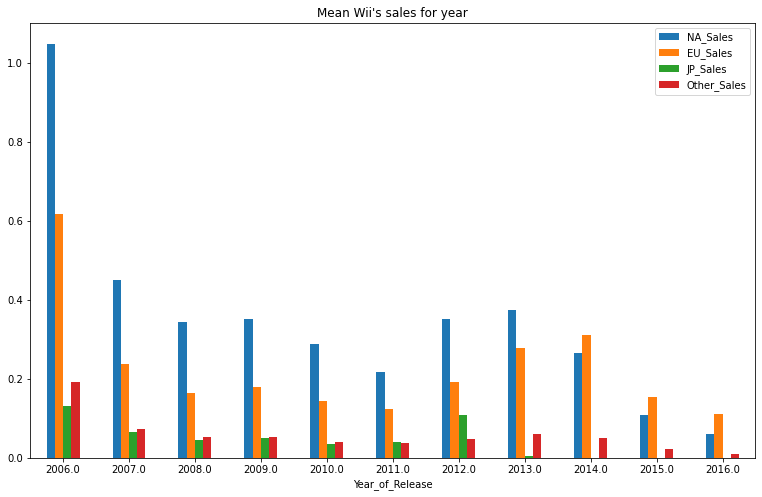

In [29]:
wii = games.where(games.Platform == 'Wii')
wii.groupby("Year_of_Release")[['NA_Sales','EU_Sales', 'JP_Sales','Other_Sales']].mean().plot(kind='bar', title = 'Mean Wii\'s sales for year', figsize = (13,8), rot=0)

### Voto medio della critica in base al Rating

Prima di tutto individuiamo i diversi Rating

In [30]:
uniqueRating = games['Rating'].unique()
print("Sono presenti", uniqueRating.size, "diversi rating:", uniqueRating)

Sono presenti 9 diversi rating: ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [31]:
rateE = np.where(games['Rating']=='E')[0]
rateM = np.where(games['Rating']=='M')[0]
rateT = np.where(games['Rating']=='T')[0]
rateE10 = np.where(games['Rating']=='E10+')[0]
rateKA = np.where(games['Rating']=='K-A')[0]
rateAO = np.where(games['Rating']=='AO')[0]
rateEC = np.where(games['Rating']=='EC')[0]
rateRP = np.where(games['Rating']=='RP')[0]

print("Rating:")
print("- E:",np.shape(rateE))
print("- M:",np.shape(rateM))
print("- T:",np.shape(rateT))
print("- E10+:",np.shape(rateE10))
print("- K-A:",np.shape(rateKA))
print("- AO:",np.shape(rateAO))
print("- EC:",np.shape(rateEC))
print("- RP:",np.shape(rateRP))

Rating:
- E: (3989,)
- M: (1562,)
- T: (2959,)
- E10+: (1418,)
- K-A: (3,)
- AO: (1,)
- EC: (8,)
- RP: (3,)


Estraiamo ora il voto medio della critica in base al Rating dei giochi

## Correlazioni

Chiediamoci se c'è qualche correlazione tra le nostre features:

#### 1. Le vendite nei diversi paesi sono correlate tra loro?

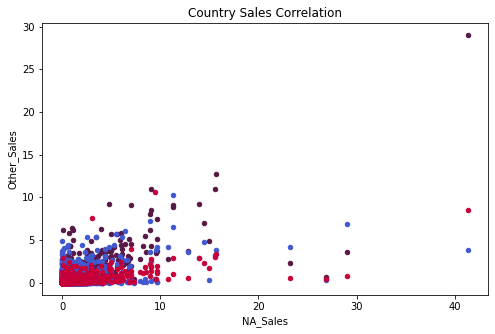

In [32]:
ax = games.plot.scatter(x='NA_Sales', y='EU_Sales', title = 'Country Sales Correlation',  legend=True, color=colors[0], figsize=(8,5))
games.plot.scatter(x='NA_Sales', y='JP_Sales', color=colors[6], ax=ax)
games.plot.scatter(x='NA_Sales', y='Other_Sales', color=colors[2], ax=ax)

Sembrerebbe esserci una buona correlazione tra le vendite nei diversi paesi

#### 2. Le vendite nei diversi paesi e le vendite globali?

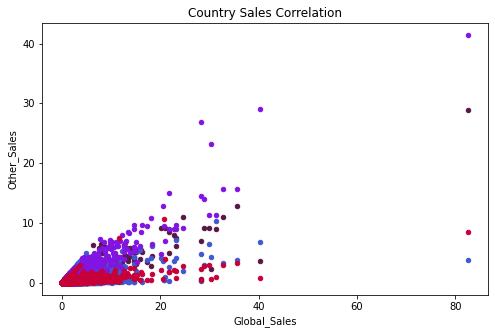

In [33]:
ax = games.plot.scatter(x='Global_Sales', y='EU_Sales', title = 'Country Sales Correlation', color=colors[0], figsize=(8,5))
games.plot.scatter(x='Global_Sales', y='JP_Sales', color=colors[6], ax=ax)
games.plot.scatter(x='Global_Sales', y='NA_Sales', color=colors[9], ax=ax)
games.plot.scatter(x='Global_Sales', y='Other_Sales', color=colors[2], ax=ax)

anche in questo caso sembrerebbe esserci una buona correlazione tra le vendite globali e quelle dei diversi paesi

#### 3. Il voto della critica influisce sulle vendite globali?

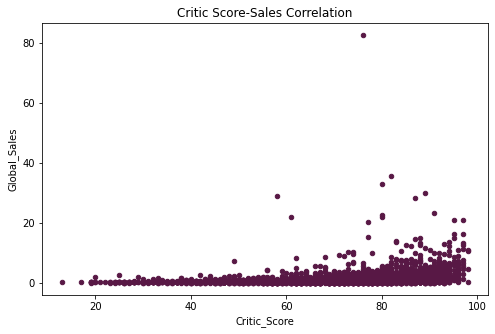

In [34]:
games_no_score.plot.scatter(x='Critic_Score', y='Global_Sales', title = 'Critic Score-Sales Correlation', color=colors[0], figsize=(8,5))

Il voto della critica non semba influenzare le vendite globali di un gioco

#### 4. Il voto degli utenti influisce sulle vendite?

In [35]:
games_no_score['User_Score'] = games_no_score['User_Score'].apply(lambda x:(x*10))

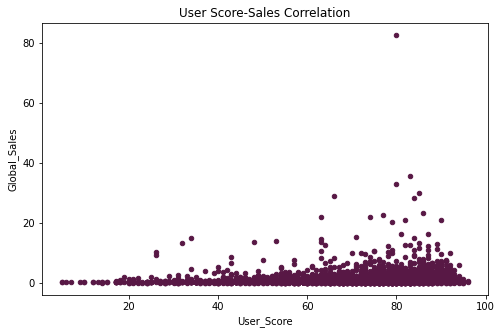

In [36]:
games_no_score.plot.scatter(x='User_Score', y='Global_Sales', title = 'User Score-Sales Correlation', color=colors[0], figsize=(8,5))

Anche il voto degli utenti non sembra influenzare le vendite

### Verifichiamo le ipotesi di correlazione

Per verificarlo, calcoliamo l'**indice di correlazione di Pearson**: 

In [37]:
corr = games.corr(method='pearson')
corr

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,1.000000,-0.092096,0.004054,-0.168237,0.037737,-0.076113,0.005940,0.110676,-0.130618,0.086278
NA_Sales,-0.092096,1.000000,0.765293,0.449760,0.638622,0.941004,0.185138,0.227216,0.066011,0.189036
EU_Sales,0.004054,0.765293,1.000000,0.435171,0.722744,0.901221,0.194714,0.244658,0.048850,0.249727
JP_Sales,-0.168237,0.449760,0.435171,1.000000,0.291075,0.612431,0.091380,0.107943,0.075077,0.045214
Other_Sales,0.037737,0.638622,0.722744,0.291075,1.000000,0.749196,0.184916,0.234397,0.053167,0.223003
Global_Sales,-0.076113,0.941004,0.901221,0.612431,0.749196,1.000000,0.201081,0.248664,0.071925,0.216409
Critic_Score,0.005940,0.185138,0.194714,0.091380,0.184916,0.201081,1.000000,0.425441,0.499061,0.245510
Critic_Count,0.110676,0.227216,0.244658,0.107943,0.234397,0.248664,0.425441,1.000000,0.172548,0.341004
User_Score,-0.130618,0.066011,0.048850,0.075077,0.053167,0.071925,0.499061,0.172548,1.000000,0.027154
User_Count,0.086278,0.189036,0.249727,0.045214,0.223003,0.216409,0.245510,0.341004,0.027154,1.000000


Per evidenziare meglio le correlazioni possiamo rappresentare la tabella attraverso una heat map

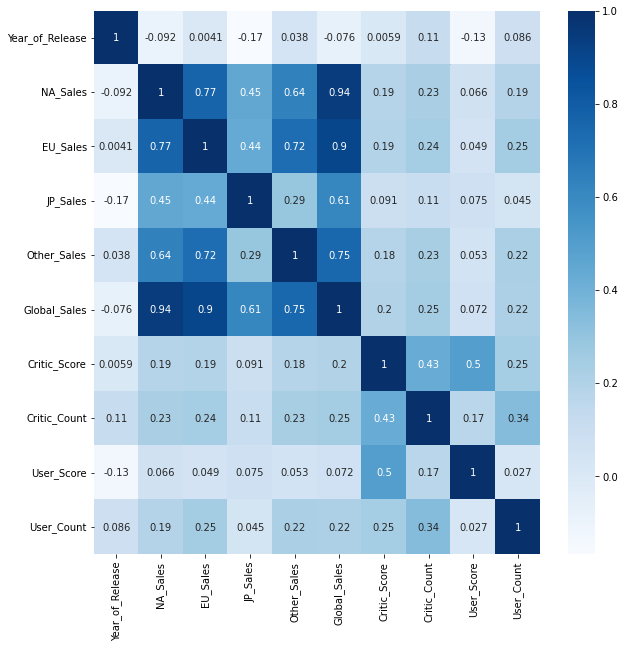

In [38]:
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(corr, cmap="Blues", annot=True, ax=ax)

Sembrerebbe esserci una correlazione abbastanza importante tra le diverse regioni di vendita, principalmente possiamo notare come sia presente un'importante correlazione tra le vendite gloabli e quelle in Nord America

## Test

### La somma delle vendite in NA, EU, JP e Other è uguale alle Vendite Globali?

Per iniziare eseguiamo un t-test per verificare se la somma delle vendite (NA, EU, JP, Other) differisce in modo significativo dalla feature Global_Sales.

Definiamo quindi le seguenti ipotesi:

- H0: La media della somma delle vendite è uguale a quella delle vendite globali
- HA: La media della somma delle vendite differisce da quella delle vendite globali

In [39]:
# Creazione di una colonna per contenere il risultato della somma di NA/JP/EU/Other_Sales
games['Calc_Global_Sales'] = games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)

In [40]:
shuffle = games.sample(frac = 1)

In [41]:
shuffle.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Calc_Global_Sales
5442,Bomberman World,PS,1998,Puzzle,Sony Computer Entertainment,0.06,0.04,0.22,0.02,0.33,68.973073,26.360261,7.125936,162.239583,NaN,NaN,0.34
223,Driver 2,PS,2000,Action,Atari,2.36,2.10,0.02,0.25,4.73,62.000000,14.000000,7.700000,92.000000,Reflections Interactive,T,4.73
9936,Marvel Trading Card Game,DS,2007,Misc,Konami Digital Entertainment,0.11,0.00,0.00,0.01,0.12,61.000000,17.000000,4.900000,7.000000,1st Playable Productions,T,0.12
10976,New Legends,XB,2002,Action,THQ,0.07,0.02,0.00,0.00,0.09,56.000000,22.000000,7.125936,162.239583,Infinite Machine,T,0.09
11445,DanceDanceRevolution,X360,2011,Simulation,Konami Digital Entertainment,0.08,0.00,0.00,0.01,0.08,68.973073,26.360261,7.125936,162.239583,Konami,E10+,0.09


Devono essere verificate due importanti condizioni:
- La distribuzione della popolazione deve essere normale e il campione deve essere ampio (>= 30)
- La dimensione della popolazione deve essere almeno 10 volte superiore a quella del campione (10n < N)

Questo per garantire che il campione sia tratto in modo indipendente.

Entrambe le condizioni sono verificate, quindi possiamo continuare con il test.

Fissiamo un livello di confidenza del 95%, quindi un livello di significatività dello 0.05

In [42]:
t_statistic, p_value = stats.ttest_1samp(a= shuffle['Calc_Global_Sales'].values[0:1000], popmean= shuffle['Global_Sales'].mean(), alternative='two-sided')
print(t_statistic)
print(p_value)

-0.5229403068664171
0.6011317526806953


Visto che il p_value è maggiore del livello di significiatività prefissato (0.05), allora accettiamo l'ipotesi nulla

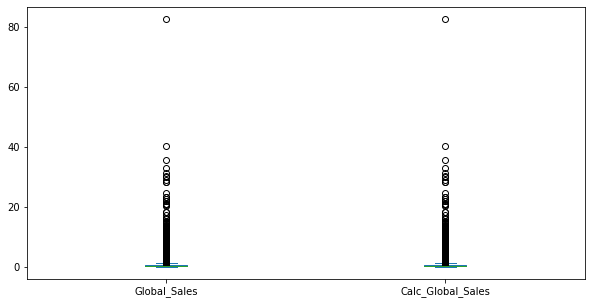

In [43]:
games[['Global_Sales', 'Calc_Global_Sales']].plot(kind='box', figsize=(10,5))

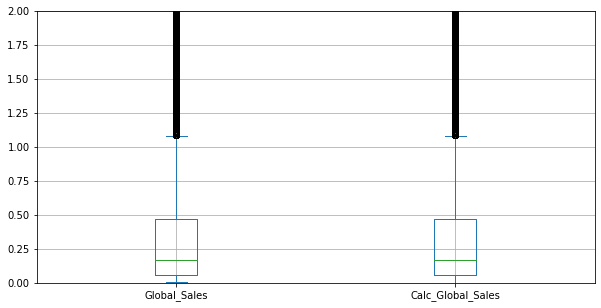

In [44]:
games[['Global_Sales', 'Calc_Global_Sales']].plot(kind='box', figsize=(10,5), ylim=(0,2), grid=True)

TODO:
- Boxplot
- Campionamento randomico del range per campione_sum:

  - list = random.sample(range(n), n_values)
  - np.concatenate()

## Metodi predittivi

Cerchiamo attraverso l'allenamento e l'utilizzo di un modello di regressione lineare se esiste una relazione lineare tra le vendite globali e le vendite in Nord America:

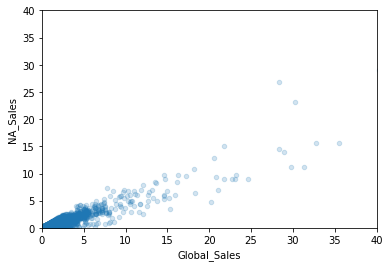

In [50]:
games.plot(kind='scatter', x='Global_Sales', y='NA_Sales', alpha=0.2, xlim=(0,40), ylim=(0,40))

Sembrerebbe che le vendite globali e in NA siano correlate, verifichiamolo con il calcolo del coefficiente di correlazione di Pearson

In [48]:
games[['Global_Sales', 'NA_Sales']].corr()

,Global_Sales,NA_Sales
Global_Sales,1.000000,0.941004
NA_Sales,0.941004,1.000000


Ora possiamo passare all'implementazione e allenamento di un modello di regressione lineare.

Prima di tutto è necessario suddividere il dataset a disposizione in due gruppi:
- Training set: dati utilizzati per l'allenamento del modello di regressione
- Validation set: dati che utilizziamo per valutare il modello creato

In [57]:
x= games[['Global_Sales']]
y= games['NA_Sales']

# Divisione randomica dei dati nei vari insiemi con una percentuale di 70 (Allenamento) -30 (Test)
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=1) 

print("X_valid: ", X_valid.shape)
print("X_train: ", X_train.shape) 

X_valid:  (4999, 1)
X_train:  (11664, 1)


In [60]:
regressor = LinearRegression()  # istanzia il modello
lin_reg = regressor.fit(X_train, y_train)  # adatta il modello al nostro set di addestamento 

print("\nintercept: ", lin_reg.intercept_)
print("coefficient: ", lin_reg.coef_)


intercept:  -0.0011981739388669532
coefficient:  [0.49475817]


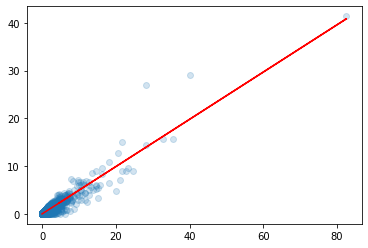

In [61]:
plt.scatter(X_train, y_train, alpha=0.2)

y_hat = X_train * lin_reg.coef_ + lin_reg.intercept_
plt.plot(X_train, y_hat, color='r')

Adesso possiamo utilizzare il modello allenato per effettuare predizioni sull'insieme di validazione

In [62]:
y_hat = regressor.predict(X_valid) # predizioni sul nostro set di collaudo
print(y_hat)

[0.01859215 0.7904149  0.1422817  ... 0.01859215 0.00869699 0.05322522]


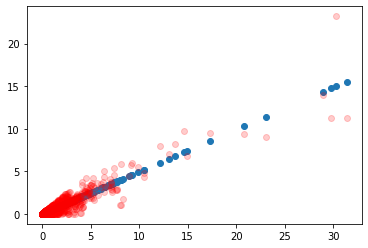

In [63]:
plt.scatter(X_valid, y_hat)
plt.scatter(X_valid, y_valid, c='r', alpha=0.2)

Stimiamo ora la precisione del modello che abbiamo allenato.

Abbiamo visto che esistono 3 metriche per valutare i modelli a regressione di machine learning:
- MAE - Mean Absolute Error
- MSE - Mean Squared Error
- RMSE - Root of Mean Squared Error



In [65]:
# Predizioni sul validation set (y_pred)
y_pred = regressor.predict(X_valid)

print ('MAE:', metrics.mean_absolute_error(y_valid, y_pred))
print ('MSE:', metrics.mean_squared_error(y_valid, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

MAE: 0.10081934467784152
MSE: 0.06756178521862642
RMSE: 0.2599264996467779


Per capire se questi risultati sono buoni dobbiamo determinare il modello nullo, cioè il modello che rappresenta in modo efficace il fatto di tirare a indovinare più e più volte il risultato atteso e vedere l'efficacia di quest'ultimo.

Essendo un modello di regressione possiamo sostituire tutti i valori della feature NA_Sales con la media sull'intero dataset.

In [66]:
mean_NAS = games['NA_Sales'].mean()
print("mean_NA_Sales: ", mean_NAS)

# Creo la nuova x con lo stesso numero di campioni del dataset originale, e con tutti i valori uguali al 
# valore medio del numero di vendite appena calcolato
null_model_y = [mean_NAS] * games.shape[0]

mean_NA_Sales:  0.26359779151415424


In [68]:
# Valutiamo il modello nullo
print ('MODELLO NULLO')
print ('MAE:', metrics.mean_absolute_error(y, null_model_y))
print ('MSE:', metrics.mean_squared_error(y, null_model_y))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y, null_model_y)))

MODELLO NULLO
MAE: 0.3077009869015204
MSE: 0.6635634767087996
RMSE: 0.8145940563917708


Possiamo facilmente notare che fortunatamente gli errori sono più grandi rispetto a quelli del modello di regressione lineare, questo ci fa capire che abbiamo fatto meglio che tirare a caso...